# Fourier Transform & advanced audio visualisation

### Contents
0. Install and import libraries
1. Simple Fourier transform: from time domain to frequency domain

Inspired by and based on Valerio Velardo's 'The Sound of AI' Link: https://www.youtube.com/watch?v=iCwMQJnKk2c&list=PL-wATfeyAMNqIee7cH3q1bh4QJFAaeNv0

### TO DO
- more text in introduction
-3 x Fourier transform: SFTF, FFT, DFT

## 0. Install & import

In [1]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

## 1. Fourier transform: from time domain to frequency domain

### Why the Fourier transform?

Decompose a sound into its frequency components.
We go from the time domain to the frequency domain.

With the Fourier Transform we can calculate (and visualise) a frequency vs magnitude diagram.


There are several ways to do it:
1. Discrete Fourier Transform (DFT, uses a lot of computational power)
2. Fast Fourier Transform (FFT, most widely used)
3. Short-time Fourier Transform (STFT, able to capture variations in time)


Links:
- https://www.youtube.com/watch?v=XQ45IgG6rJ4&list=PL-wATfeyAMNqIee7cH3q1bh4QJFAaeNv0&index=10
- https://www.youtube.com/watch?v=spUNpyF58BY&t=2s

In [3]:
from glob import glob
my_wavs = glob('*.wav')
print(my_wavs)

['11k16bitpcm.wav', 'claxon_1m.wav', 'claxon_close.wav', 'claxon_freesound.wav', 'claxon_iphone.wav', 'claxon_michiel.wav', 'converted.wav', 'example.wav', 'file.wav', 'loudness.wav', 'miaow_16k.wav', 'my-audio.wav', 'my_test.wav', 'my_wav.wav', 'new_file.wav', 'noise_add.wav', 'out.wav', 'output.wav', 'piano_c.wav', 'robot0.wav', 'robot1.wav', 'robot2.wav', 'robot3.wav', 'Sample_audio.wav', 'silence.wav', 'speech_whistling2.wav', 'test.wav', 'test2.wav', 'test3.wav', 'tone_220.wav', 'tone_440.wav', 'welcome.wav']


In [4]:
audio_path= 'piano_c.wav'
ipd.Audio(audio_path)

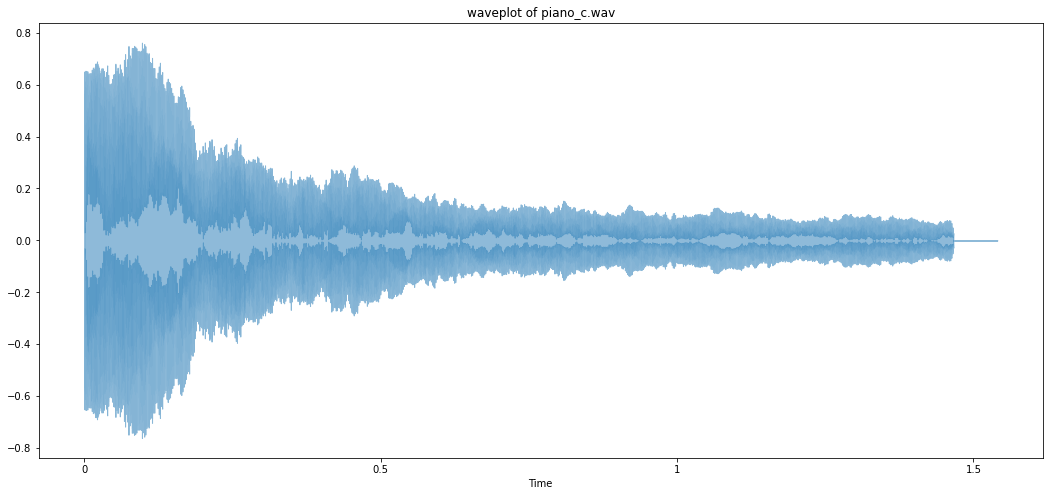

33968
CPU times: total: 3.16 s
Wall time: 4.92 s


In [5]:
%%time
# load audio file
signal, sr = librosa.load(audio_path)
# plot waveform
plt.figure(figsize=(18, 8))
plt.title(f'waveplot of {audio_path}')
librosa.display.waveshow(signal, sr=sr, alpha=0.5)
plt.show()
print(len(signal))

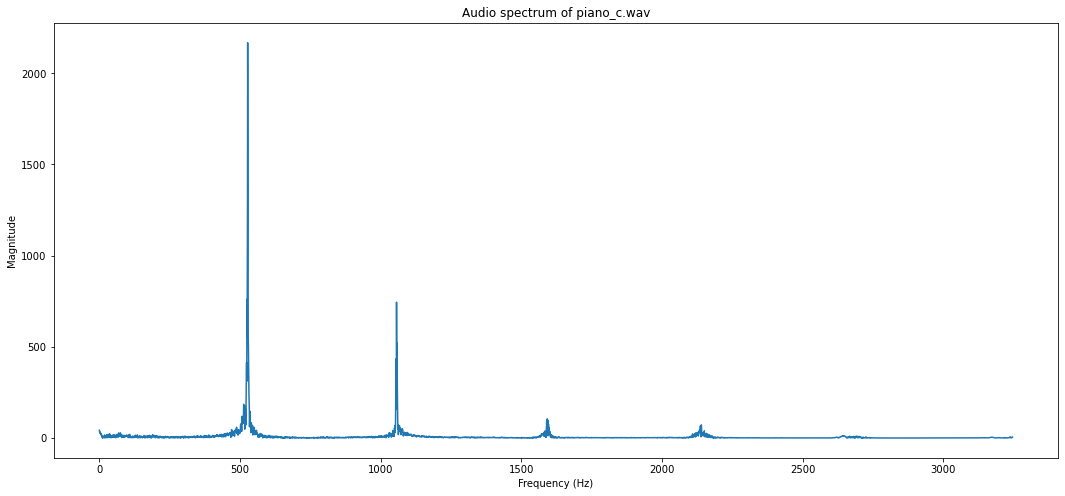

In [5]:
# derive spectrum using FT
ft = sp.fft.fft(signal) #do a Fourier transform using scipy
magnitude = np.absolute(ft) # if we take the absolute value of the ft we get the magnitude.
frequency = np.linspace(0, sr, len(magnitude))

# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.title(f'Audio spectrum of {audio_path}')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

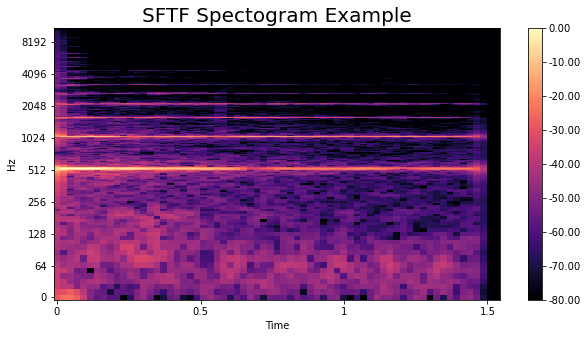

In [6]:
#creating a spectrogram
D = librosa.stft(signal)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('SFTF Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()